### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Data visualization

import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
import seaborn as sns



import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import re



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alejandrohernandez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alejandrohernandez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
pip install isodate


Note: you may need to restart the kernel to use updated packages.


### load the DataSet

In [4]:
df_BCC = pd.read_csv('/Users/alejandrohernandez/Desktop/test/bbc.csv')

## Explore Dataset and data pre-processing

In [5]:
# Check data types
df_BCC.dtypes

position                  int64
channel_id               object
channel_title            object
video_id                 object
published_at             object
video_title              object
video_description        object
video_category_id         int64
video_category_label     object
duration                 object
duration_sec              int64
dimension                object
definition               object
caption                    bool
licensed_content        float64
view_count                int64
like_count              float64
dislike_count           float64
favorite_count            int64
comment_count           float64
dtype: object

This data contains different kind of data Categorical and numerical, but will change some values if it's necessary.

In [6]:
df_BCC.head()

,position,channel_id,channel_title,video_id,published_at,video_title,video_description,video_category_id,video_category_label,duration,duration_sec,dimension,definition,caption,licensed_content,view_count,like_count,dislike_count,favorite_count,comment_count
0,1,UCCj956IF62FbT7Gouszaj9w,BBC,8qH0pGdjB_U,2020-08-13T15:00:02Z,Colin Robinson's Origins of the Species - What...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT5M23S,323,2d,hd,False,1.0,738,76.0,7.0,0,4.0
1,2,UCCj956IF62FbT7Gouszaj9w,BBC,lqeS-rOoBSw,2020-08-13T14:30:04Z,Maisie Smith and Zack Morris on EastEnders' la...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT3M15S,195,2d,hd,False,1.0,512,55.0,9.0,0,13.0
2,3,UCCj956IF62FbT7Gouszaj9w,BBC,JMfkBavl1ks,2020-08-13T05:50:21Z,A-level results to arrive in year with no exam...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,27,Education,PT14M48S,888,2d,hd,False,NaN,19888,326.0,50.0,0,128.0
3,4,UCCj956IF62FbT7Gouszaj9w,BBC,T_6RRmkLOSs,2020-08-12T13:00:13Z,8 signs you're in survival mode and how to sta...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,27,Education,PT3M50S,230,2d,hd,False,1.0,14515,324.0,532.0,0,282.0
4,5,UCCj956IF62FbT7Gouszaj9w,BBC,3-mayD_9Yg8,2020-08-12T11:00:02Z,The secret Heathrow lounge that costs £2700 ju...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT1M52S,112,2d,hd,False,1.0,15644,331.0,14.0,0,22.0


In [7]:
# Convert count columns to numeric
numeric_cols = ['view_count','like_count', 'dislike_count', 'comment_count']
df_BCC[numeric_cols] = df_BCC[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [8]:
# convert duration to seconds
import isodate
df_BCC['durationSecs'] = df_BCC['duration'].apply(lambda x: isodate.parse_duration(x))
df_BCC['durationSecs'] = df_BCC['durationSecs'].astype('timedelta64[s]')

## Minimum & Maximum published time

In [9]:
# Add column year
df_BCC['year'] = pd.to_datetime(df_BCC['published_at']).dt.year

In [10]:
# Minimun and Maximun year
print('Minimum year:', df_BCC['year'].min())
print('Maximum year:', df_BCC['year'].max())

Minimum year: 2007
Maximum year: 2020


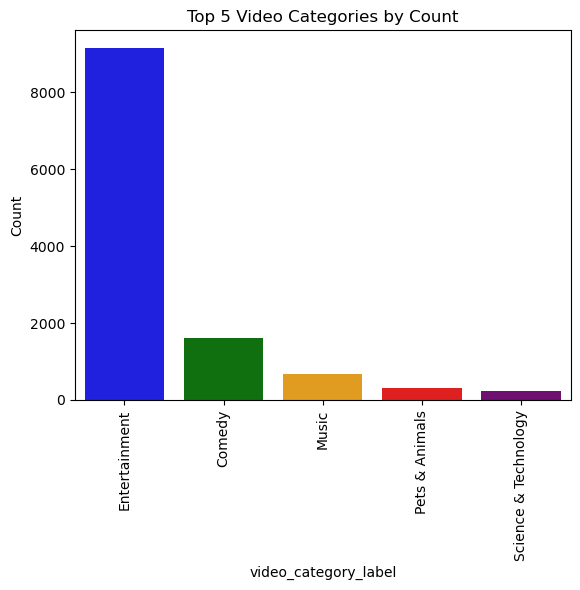

In [23]:

sns.barplot(x=df_BCC["video_category_label"].value_counts().head(5).index,
            y=df_BCC["video_category_label"].value_counts().head(5).values,
            palette=["blue", "green", "orange", "red", "purple"])

# Add labels and title

plt.xlabel("video_category_label")
plt.ylabel("Count")
plt.title("Top 5 Video Categories by Count")

# Rotate x-axis

plt.xticks(rotation=90)

plt.show()

Entertainment is the most popular category with over 8000 and science and technology is the lowest in the top 5.

In [25]:
# check the null values
df_BCC.isnull().sum()

position                  0
channel_id                0
channel_title             0
video_id                  0
published_at              0
video_title               0
video_description         0
video_category_id         0
video_category_label      0
duration                  0
duration_sec              0
dimension                 0
definition                0
caption                   0
licensed_content        578
view_count                0
like_count                2
dislike_count             2
favorite_count            0
comment_count            95
durationSecs              0
year                      0
dtype: int64

## Slice Dataset

In [26]:
#Slice Dataset with the following columns
df_BCC_sliced = df_BCC[["published_at", "video_category_id", "duration", "dimension", "licensed_content", "favorite_count", "video_title"]]


In [27]:
# Clean Funtion
def clean_text(text):
    # lowercase
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Removing digits
    text = re.sub(r'\d+', '', text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Removing strings
    specific_strings = ['bbc one', 'bbc two', 'bbc three', 'bbc', 'part', 'episode', 'series', 'preview', 'show']
    for string in specific_strings:
        text = text.replace(string, '')
    # Removing spaces
    text = ' '.join(text.split())
    return text

In [28]:
##Create column video title clean 
df_BCC_sliced["video_title_clean"] = df_BCC_sliced["video_title"].apply(clean_text)

/var/folders/cd/26jlb2fn5dn3bk_4ycnlc6b00000gn/T/ipykernel_22991/220438444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BCC_sliced["video_title_clean"] = df_BCC_sliced["video_title"].apply(clean_text)


In [29]:
df_BCC_sliced

,published_at,video_category_id,duration,dimension,licensed_content,favorite_count,video_title,video_title_clean
0,2020-08-13T15:00:02Z,24,PT5M23S,2d,1.0,0,Colin Robinson's Origins of the Species - What...,colin robinsons origins species shadows
1,2020-08-13T14:30:04Z,24,PT3M15S,2d,1.0,0,Maisie Smith and Zack Morris on EastEnders' la...,maisie smith zack morris eastenders latest tee...
2,2020-08-13T05:50:21Z,27,PT14M48S,2d,NaN,0,A-level results to arrive in year with no exam...,alevel results arrive year exams covid top sto...
3,2020-08-12T13:00:13Z,27,PT3M50S,2d,1.0,0,8 signs you're in survival mode and how to sta...,signs youre survival mode start living
4,2020-08-12T11:00:02Z,24,PT1M52S,2d,1.0,0,The secret Heathrow lounge that costs £2700 ju...,secret heathrow lounge costs get qi
...,...,...,...,...,...,...,...,...
12451,2007-01-31T13:57:11Z,24,PT2M59S,2d,1.0,0,Behind the scenes on Gavin & Stacey - BBC,behind scenes gavin stacey
12452,2007-01-31T12:00:16Z,24,PT2M47S,2d,1.0,0,BBC - Danny Wallace's Castaway Video Diary Part 1,danny wallaces castaway video diary
12453,2007-01-23T12:17:29Z,25,PT2M11S,2d,1.0,0,BBC News - Clive Myrie in Baghdad Part 1,news clive myrie baghdad
12454,2007-01-22T14:18:59Z,24,PT2M23S,2d,1.0,0,BBC One - Freema Agyeman's Doctor Who Video Di...,freema agyemans doctor video diary


## Top 5 keywords from Video title clean 

In [32]:
## Convert 'published_at' to datetime if it is not in that format
df_BCC_sliced['published_at'] = pd.to_datetime(df_BCC_sliced['published_at'])

/var/folders/cd/26jlb2fn5dn3bk_4ycnlc6b00000gn/T/ipykernel_22991/2170094422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BCC_sliced['published_at'] = pd.to_datetime(df_BCC_sliced['published_at'])


In [31]:
df_BCC_sliced['published_at'] = pd.to_datetime(df_BCC_sliced['published_at'], format='%Y-%m-%d %H:%M:%S')

/var/folders/cd/26jlb2fn5dn3bk_4ycnlc6b00000gn/T/ipykernel_22991/2743388600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BCC_sliced['published_at'] = pd.to_datetime(df_BCC_sliced['published_at'], format='%Y-%m-%d %H:%M:%S')


In [33]:
# Create values min and max year
min_year = df_BCC_sliced['published_at'].dt.year.min()
max_year = df_BCC_sliced["published_at"].dt.year.max()

In [37]:
# Top 5 keywords for each year
for year in range(min_year, max_year + 1):
    year_df = df_BCC_sliced[df_BCC_sliced["published_at"].dt.year == year]
    top_keywords = year_df["video_title_clean"].str.split().explode().value_counts().head(5)
    print("Top 5 keywords for", year, ":", top_keywords)

Top 5 keywords for 2007 : dancing     37
strictly    37
come        36
ross        35
jonathan    34
Name: video_title_clean, dtype: int64
Top 5 keywords for 2008 : dancing     113
strictly    112
come        111
round        89
id           70
Name: video_title_clean, dtype: int64
Top 5 keywords for 2009 : week        103
night        88
jonathan     86
ross         85
friday       83
Name: video_title_clean, dtype: int64
Top 5 keywords for 2010 : rainbow       135
dance         114
week          104
ep             98
eurovision     84
Name: video_title_clean, dtype: int64
Top 5 keywords for 2011 : song          101
eurovision     96
graham         96
contest        93
norton         90
Name: video_title_clean, dtype: int64
Top 5 keywords for 2012 : voice       203
uk          197
come        139
dancing     139
strictly    137
Name: video_title_clean, dtype: int64
Top 5 keywords for 2013 : voice       212
uk          199
come        155
strictly    152
dancing     151
Name: video_tit

## Create a new column Engagement_Rate

In [38]:
df_BCC["engagement_rate"] = (df_BCC["like_count"] + df_BCC["comment_count"] + df_BCC["dislike_count"]) / df_BCC["view_count"] * 100

##round it up to 1 decimmal

df_BCC["engagement_rate"] = df_BCC["engagement_rate"].apply(np.ceil)


In [39]:
df_BCC.head(5)

,position,channel_id,channel_title,video_id,published_at,video_title,video_description,video_category_id,video_category_label,duration,...,caption,licensed_content,view_count,like_count,dislike_count,favorite_count,comment_count,durationSecs,year,engagement_rate
0,1,UCCj956IF62FbT7Gouszaj9w,BBC,8qH0pGdjB_U,2020-08-13T15:00:02Z,Colin Robinson's Origins of the Species - What...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT5M23S,...,False,1.0,738.0,76.0,7.0,0,4.0,323.0,2020,12.0
1,2,UCCj956IF62FbT7Gouszaj9w,BBC,lqeS-rOoBSw,2020-08-13T14:30:04Z,Maisie Smith and Zack Morris on EastEnders' la...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT3M15S,...,False,1.0,512.0,55.0,9.0,0,13.0,195.0,2020,16.0
2,3,UCCj956IF62FbT7Gouszaj9w,BBC,JMfkBavl1ks,2020-08-13T05:50:21Z,A-level results to arrive in year with no exam...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,27,Education,PT14M48S,...,False,NaN,19888.0,326.0,50.0,0,128.0,888.0,2020,3.0
3,4,UCCj956IF62FbT7Gouszaj9w,BBC,T_6RRmkLOSs,2020-08-12T13:00:13Z,8 signs you're in survival mode and how to sta...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,27,Education,PT3M50S,...,False,1.0,14515.0,324.0,532.0,0,282.0,230.0,2020,8.0
4,5,UCCj956IF62FbT7Gouszaj9w,BBC,3-mayD_9Yg8,2020-08-12T11:00:02Z,The secret Heathrow lounge that costs £2700 ju...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT1M52S,...,False,1.0,15644.0,331.0,14.0,0,22.0,112.0,2020,3.0


## Create a new column title_len

In [41]:
df_BCC_sliced["title_len"] = df_BCC_sliced["video_title_clean"].str.len()

/var/folders/cd/26jlb2fn5dn3bk_4ycnlc6b00000gn/T/ipykernel_22991/3207437881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BCC_sliced["title_len"] = df_BCC_sliced["video_title_clean"].str.len()


In [42]:
df_BCC_sliced

,published_at,video_category_id,duration,dimension,licensed_content,favorite_count,video_title,video_title_clean,title_len
0,2020-08-13 15:00:02+00:00,24,PT5M23S,2d,1.0,0,Colin Robinson's Origins of the Species - What...,colin robinsons origins species shadows,39
1,2020-08-13 14:30:04+00:00,24,PT3M15S,2d,1.0,0,Maisie Smith and Zack Morris on EastEnders' la...,maisie smith zack morris eastenders latest tee...,55
2,2020-08-13 05:50:21+00:00,27,PT14M48S,2d,NaN,0,A-level results to arrive in year with no exam...,alevel results arrive year exams covid top sto...,58
3,2020-08-12 13:00:13+00:00,27,PT3M50S,2d,1.0,0,8 signs you're in survival mode and how to sta...,signs youre survival mode start living,38
4,2020-08-12 11:00:02+00:00,24,PT1M52S,2d,1.0,0,The secret Heathrow lounge that costs £2700 ju...,secret heathrow lounge costs get qi,35
...,...,...,...,...,...,...,...,...,...
12451,2007-01-31 13:57:11+00:00,24,PT2M59S,2d,1.0,0,Behind the scenes on Gavin & Stacey - BBC,behind scenes gavin stacey,26
12452,2007-01-31 12:00:16+00:00,24,PT2M47S,2d,1.0,0,BBC - Danny Wallace's Castaway Video Diary Part 1,danny wallaces castaway video diary,35
12453,2007-01-23 12:17:29+00:00,25,PT2M11S,2d,1.0,0,BBC News - Clive Myrie in Baghdad Part 1,news clive myrie baghdad,24
12454,2007-01-22 14:18:59+00:00,24,PT2M23S,2d,1.0,0,BBC One - Freema Agyeman's Doctor Who Video Di...,freema agyemans doctor video diary,34


### Top 50% (engagement rate >= 0.6) is 1 and bottom 50% is 0

In [44]:
df_BCC["engagement_score"] = df_BCC["engagement_rate"].apply(lambda x: 1 if x >= 0.6 else 0)

In [46]:
df_BCC.head(5)

,position,channel_id,channel_title,video_id,published_at,video_title,video_description,video_category_id,video_category_label,duration,...,licensed_content,view_count,like_count,dislike_count,favorite_count,comment_count,durationSecs,year,engagement_rate,engagement_score
0,1,UCCj956IF62FbT7Gouszaj9w,BBC,8qH0pGdjB_U,2020-08-13T15:00:02Z,Colin Robinson's Origins of the Species - What...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT5M23S,...,1.0,738.0,76.0,7.0,0,4.0,323.0,2020,12.0,1
1,2,UCCj956IF62FbT7Gouszaj9w,BBC,lqeS-rOoBSw,2020-08-13T14:30:04Z,Maisie Smith and Zack Morris on EastEnders' la...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT3M15S,...,1.0,512.0,55.0,9.0,0,13.0,195.0,2020,16.0,1
2,3,UCCj956IF62FbT7Gouszaj9w,BBC,JMfkBavl1ks,2020-08-13T05:50:21Z,A-level results to arrive in year with no exam...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,27,Education,PT14M48S,...,NaN,19888.0,326.0,50.0,0,128.0,888.0,2020,3.0,1
3,4,UCCj956IF62FbT7Gouszaj9w,BBC,T_6RRmkLOSs,2020-08-12T13:00:13Z,8 signs you're in survival mode and how to sta...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,27,Education,PT3M50S,...,1.0,14515.0,324.0,532.0,0,282.0,230.0,2020,8.0,1
4,5,UCCj956IF62FbT7Gouszaj9w,BBC,3-mayD_9Yg8,2020-08-12T11:00:02Z,The secret Heathrow lounge that costs £2700 ju...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT1M52S,...,1.0,15644.0,331.0,14.0,0,22.0,112.0,2020,3.0,1


## Encode "video Category"

In [47]:
# Encoding video category labels
category_encoder = LabelEncoder()
df_BCC['video_category_encoded'] = category_encoder.fit_transform(df_BCC['video_category_id'])

# Encoding definition labels
definition_encoder = LabelEncoder()
df_BCC['definition_encoded'] = definition_encoder.fit_transform(df_BCC['definition'])

## Visualize Correlation

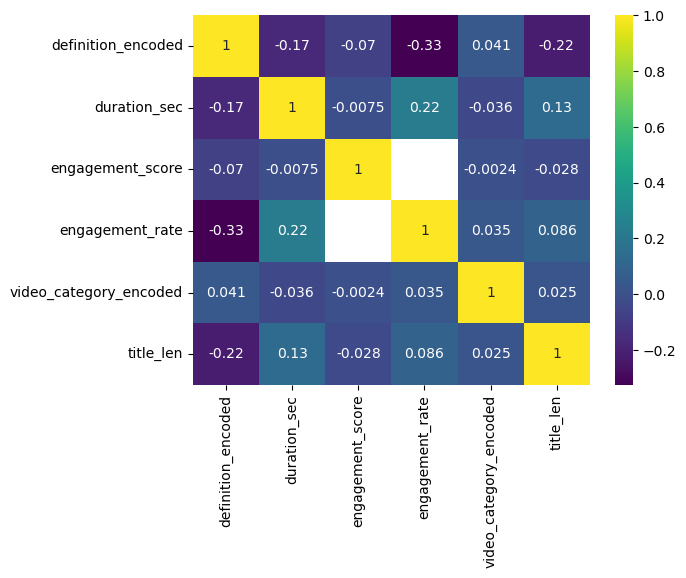

In [48]:


# merge Dataset df_BCC & df_BCC_sliced 
df_merged = pd.concat([df_BCC, df_BCC_sliced['title_len']], axis=1)

# Select the columns needed to calculate the correlation.
columns_for_corr = ["definition_encoded", "duration_sec", "engagement_score", "published_at", "engagement_rate", "video_category_encoded", "title_len"]

# Correlation
corr = df_merged[columns_for_corr].corr()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

Negative correlation

1. definition_encoded  -  engagement_rate
Videos in certain specific category may have less engagement compared to other kind of videos. 

2.definition_encoded  -  title_len
Specific categories of videos with longer titles may affect the engagement of the viewers. 

3.duration_sec        -  definition_encoded
Depend on of the category the duration will be varies. For example  videos in specific categories may have shorter duration compare than other categories 

Positive correlation

1.engagement_rate - duration_sec

The longest videos duration may have more engagement rate. For instance the viewers are more interest in the longer duration videos 

2.title_len       - duration_sec

Titles with more detail in length present longer duration of the videos.

3.engagement_rate - title_len

Videos with longer titles tend to have a higher engagement rate for the viewers.


we can see that longer videos and longer titles have higher viewer engagement. Has a positive correlation

